In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
import ThermoPyle as TP
import CoolProp.CoolProp as CP
from cytoolz import get
import itertools as it
%matplotlib notebook
mpld3.enable_notebook()
#print(plt.style.available)
plt.style.use(["seaborn-talk","seaborn-notebook","seaborn-paper"])

In [9]:
%run ../scripts/der_CSV_gen.py

Iteration 0
    Generating Initial Fluid Object.
    Success!
    This Iteration: 0 hours, 0 minutes, 11.194 seconds
    Time Elapsed: 0 hours, 0 minutes, 11.194 seconds


Iteration 1 of 124:
    Calculating Column d(P)/d(S)|U
    Success!
    This Iteration: 0 hours, 0 minutes, 11.184 seconds
    Time Elapsed: 0 hours, 0 minutes, 22.378 seconds

Iteration 2 of 124:
    Calculating Column d(G)/d(D)|T
    Success!
    This Iteration: 0 hours, 0 minutes, 10.643 seconds
    Time Elapsed: 0 hours, 0 minutes, 33.024 seconds

Iteration 3 of 124:
    Calculating Column d(S)/d(D)|P
    Success!
    This Iteration: 0 hours, 0 minutes, 10.733 seconds
    Time Elapsed: 0 hours, 0 minutes, 43.758 seconds

Iteration 4 of 124:
    Calculating Column d(T)/d(G)|D
    Success!
    This Iteration: 0 hours, 0 minutes, 10.638 seconds
    Time Elapsed: 0 hours, 0 minutes, 54.397 seconds

Iteration 5 of 124:
    Calculating Column d(T)/d(D)|G
    Success!
    This Iteration: 0 hours, 0 minutes, 11.417 secon

    Success!
    This Iteration: 0 hours, 0 minutes, 9.615 seconds
    Time Elapsed: 0 hours, 6 minutes, 28.395 seconds

Iteration 36 of 124:
    Calculating Column d(S)/d(U)|T
    Success!
    This Iteration: 0 hours, 0 minutes, 10.652 seconds
    Time Elapsed: 0 hours, 6 minutes, 39.047 seconds

Iteration 37 of 124:
    Calculating Column d(G)/d(D)|S
    Success!
    This Iteration: 0 hours, 0 minutes, 12.476 seconds
    Time Elapsed: 0 hours, 6 minutes, 51.528 seconds

Iteration 38 of 124:
    Calculating Column d(U)/d(T)|G
    Success!
    This Iteration: 0 hours, 0 minutes, 12.636 seconds
    Time Elapsed: 0 hours, 7 minutes, 4.164 seconds

Iteration 39 of 124:
    Calculating Column d(P)/d(S)|G
    Success!
    This Iteration: 0 hours, 0 minutes, 9.979 seconds
    Time Elapsed: 0 hours, 7 minutes, 14.143 seconds

Iteration 40 of 124:
    Calculating Column d(T)/d(S)|U
    Success!
    This Iteration: 0 hours, 0 minutes, 11.951 seconds
    Time Elapsed: 0 hours, 7 minutes, 26.094 

    Success!
    This Iteration: 0 hours, 0 minutes, 11.627 seconds
    Time Elapsed: 0 hours, 13 minutes, 31.306 seconds

Iteration 72 of 124:
    Calculating Column d(P)/d(D)|U
    Success!
    This Iteration: 0 hours, 0 minutes, 11.018 seconds
    Time Elapsed: 0 hours, 13 minutes, 42.324 seconds

Iteration 73 of 124:
    Calculating Column d(T)/d(S)|D
    Success!
    This Iteration: 0 hours, 0 minutes, 9.799 seconds
    Time Elapsed: 0 hours, 13 minutes, 52.124 seconds

Iteration 74 of 124:
    Calculating Column S
    Success!
    This Iteration: 0 hours, 0 minutes, 9.356 seconds
    Time Elapsed: 0 hours, 14 minutes, 1.479 seconds

Iteration 75 of 124:
    Calculating Column d(S)/d(D)|G
    Success!
    This Iteration: 0 hours, 0 minutes, 9.467 seconds
    Time Elapsed: 0 hours, 14 minutes, 10.946 seconds

Iteration 76 of 124:
    Calculating Column d(U)/d(T)|S
    Success!
    This Iteration: 0 hours, 0 minutes, 9.52 seconds
    Time Elapsed: 0 hours, 14 minutes, 20.467 seconds

    Success!
    This Iteration: 0 hours, 0 minutes, 9.222 seconds
    Time Elapsed: 0 hours, 19 minutes, 10.78 seconds

Iteration 108 of 124:
    Calculating Column d(T)/d(S)|P
    Success!
    This Iteration: 0 hours, 0 minutes, 9.082 seconds
    Time Elapsed: 0 hours, 19 minutes, 19.862 seconds

Iteration 109 of 124:
    Calculating Column d(T)/d(U)|D
    Success!
    This Iteration: 0 hours, 0 minutes, 9.378 seconds
    Time Elapsed: 0 hours, 19 minutes, 29.24 seconds

Iteration 110 of 124:
    Calculating Column d(G)/d(S)|T
    Success!
    This Iteration: 0 hours, 0 minutes, 9.223 seconds
    Time Elapsed: 0 hours, 19 minutes, 38.463 seconds

Iteration 111 of 124:
    Calculating Column d(D)/d(P)|T
    Success!
    This Iteration: 0 hours, 0 minutes, 8.993 seconds
    Time Elapsed: 0 hours, 19 minutes, 47.456 seconds

Iteration 112 of 124:
    Calculating Column d(P)/d(T)|G
    Success!
    This Iteration: 0 hours, 0 minutes, 9.289 seconds
    Time Elapsed: 0 hours, 19 minutes, 5

NameError: name 'pd' is not defined

In [17]:
myfluid.data["V"] = pd.Series(myfluid.M / myfluid.data["D"], index=myfluid.data.index)
myfluid.refresh()
myfluid.clean()

In [19]:
myfluid.write_data("../finalData/", mode="dual", filename="with_derivatives_and_volume")

In [26]:
rescaled = myfluid.copy()

In [23]:
varrange = {col:[min(rescaled.data[col]),max(rescaled.data[col])] for col in rescaled.vars}

invars = ["T", "P", "S", "D", "V"]

for var in invars:
    rescaled.data[var] = rescaled.data[var].apply(TP.rescale(get(var, varrange), [0,216]))

rescaled.data["U"] = rescaled.data["U"].apply(TP.rescale(urange, [15, 152]))

In [27]:
rescaled.write_data("../finalData/", mode="dual", filename="with_derivatives_and_volume_SCALED")

In [40]:
for i in range(10):
    dU = 0.1*i + 0.1
    uSel = 10 + 10*i
    rescaled.data.ix[np.abs(rescaled.data["U"] - uSel) <= 1, "U"] = rescaled.data.ix[np.abs(rescaled.data["U"] - uSel) <= 1 , "U"] + dU

rescaled.data.ix[np.abs(rescaled.data["d(U)/d(S)|P"] - 400) <= 50, 'U'] = rescaled.data.ix[np.abs(rescaled.data["d(U)/d(S)|P"] - 400) <= 50, 'U'] + 5

<IPython.core.display.Javascript object>


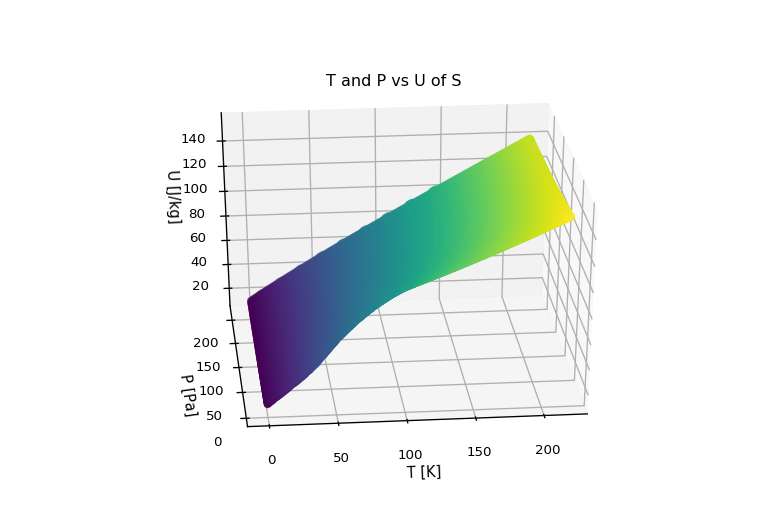

In [41]:
TP.fluid_plot(rescaled)

['T', 'P', 'U', 'S', 'd(U)/d(S)|P', 'd(U)/d(P)|T', 'd(U)/d(T)|P']
pmap({'fluid': 'Water', 'numPoints': [216, 216], 'date': '2017-03-01 @ 10:28:53', 'units': ['K', 'J/kg/K', 'J/kg', 'J/kg/K', 'UnknownVar', 'UnknownVar', 'UnknownVar'], 'yvar': 'S', 'colorMap': 'viridis', 'xvar': 'T', 'vars': ['T', 'S', 'U', 'S', 'd(U)/d(S)|P', 'd(U)/d(P)|T', 'd(U)/d(T)|P'], 'zvar': 'U'})


<IPython.core.display.Javascript object>


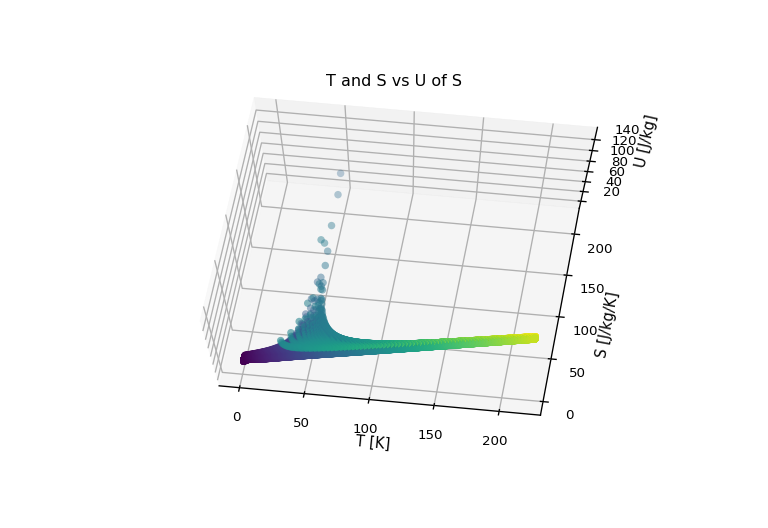

In [25]:
myfluid2 = rescaled.copy()
print(myfluid2.vars)
myfluid2.yvar = "S"
myfluid2.vars[1] = "S"
myfluid2.units[1] = "J/kg*K"
#myfluid2.clean()
myfluid2.make_meta()
print(myfluid2.meta)
TP.fluid_plot(myfluid2)

In [42]:
rescaled.write_data("../finalData/")